<a href="https://colab.research.google.com/github/oleksandrkuzmychov/DL_2024_Kuzmychov/blob/main/Lab3_DL_Kuzmychov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Датасет**

In [20]:
ds = load_digits()
x = ds.data
y = ds.target

print(x.shape, y.shape)

(1797, 64) (1797,)


<Figure size 640x480 with 0 Axes>

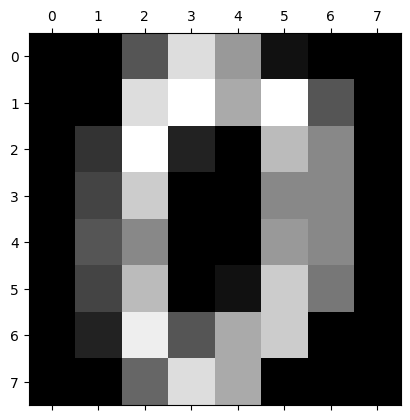

In [21]:
plt.gray()
plt.matshow(ds.images[0])
plt.show()

In [22]:
# ds

In [23]:
class DigitsDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

train_dataset = DigitsDataset(x_train, y_train)
test_dataset = DigitsDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## **MLP**

In [38]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size, activations):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size

        for hidden_size, activation in zip(hidden_layers, activations):
            layers.append(nn.Linear(in_features, hidden_size))
            layers.append(activation)
            in_features = hidden_size

        layers.append(nn.Linear(in_features, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

## **Training and Testing**

In [39]:
input_size = x_train.shape[1]
hidden_layers = [64, 32]
output_v = len(np.unique(y))
activations = [nn.ReLU(), nn.ReLU()]
learning_rate = 0.001

model = MLP(input_size, hidden_layers, output_v, activations)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [41]:
n_epochs = 50
loss_change = []

model.train()
for epoch in range(n_epochs):
    loss_show = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        loss_show += loss.item()
        loss_change.append(loss.item())
    print(f'Epoch [{epoch+1}], Loss: {loss_show/len(train_loader):.4f}')

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

Epoch [1], Loss: 0.8334
Epoch [2], Loss: 0.7744
Epoch [3], Loss: 0.7093
Epoch [4], Loss: 0.6574
Epoch [5], Loss: 0.6140
Epoch [6], Loss: 0.5714
Epoch [7], Loss: 0.5297
Epoch [8], Loss: 0.5014
Epoch [9], Loss: 0.4666
Epoch [10], Loss: 0.4467
Epoch [11], Loss: 0.4159
Epoch [12], Loss: 0.3974
Epoch [13], Loss: 0.3684
Epoch [14], Loss: 0.3516
Epoch [15], Loss: 0.3326
Epoch [16], Loss: 0.3140
Epoch [17], Loss: 0.2972
Epoch [18], Loss: 0.2876
Epoch [19], Loss: 0.2708
Epoch [20], Loss: 0.2595
Epoch [21], Loss: 0.2504
Epoch [22], Loss: 0.2388
Epoch [23], Loss: 0.2290
Epoch [24], Loss: 0.2165
Epoch [25], Loss: 0.2083
Epoch [26], Loss: 0.2016
Epoch [27], Loss: 0.1928
Epoch [28], Loss: 0.1864
Epoch [29], Loss: 0.1768
Epoch [30], Loss: 0.1698
Epoch [31], Loss: 0.1654
Epoch [32], Loss: 0.1575
Epoch [33], Loss: 0.1537
Epoch [34], Loss: 0.1494
Epoch [35], Loss: 0.1429
Epoch [36], Loss: 0.1377
Epoch [37], Loss: 0.1336
Epoch [38], Loss: 0.1291
Epoch [39], Loss: 0.1267
Epoch [40], Loss: 0.1221
Epoch [41

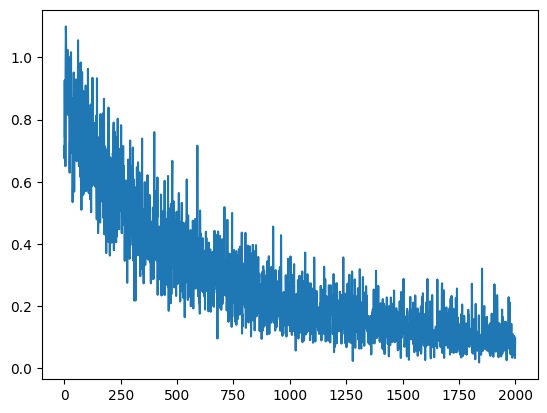

In [42]:
plt.plot(loss_change)
plt.show()